#Importare le librerie

In [34]:
#importo tutte le librerie necessarie.
import numpy as np
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

#1. caricare i dati in un dataframe

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")

#2. visualizzare i dati

In [36]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#3. eliminare dal dataframe tutti i record con valori NaN

In [37]:
df.dropna(inplace=True)

In [38]:
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,Japanese,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,Japanese,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


#4. calcolare il numero di show per ogni lingua. Ordinare in ordine decrescente sul numero

In [39]:
#d = df.groupby(["Name of the show","Language"]).count()
l = df['Language'].value_counts()
l

English     155
Hindi        17
Japanese      7
Spanish       1
Deutsch       1
Suomi         1
Name: Language, dtype: int64

#5. visualizzare il grafico a barre verticali dei dati precedenti

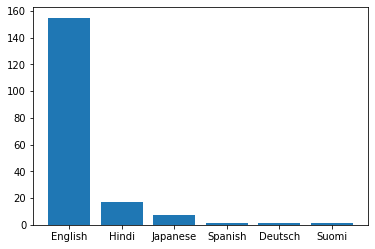

In [40]:
fig,ax = plt.subplots()
ax.bar(l.index[:10],l[:10])
fig.show()

#6. visualizzare le stesse informazioni dell'esercizio precedente utilizzando un grafico a torta

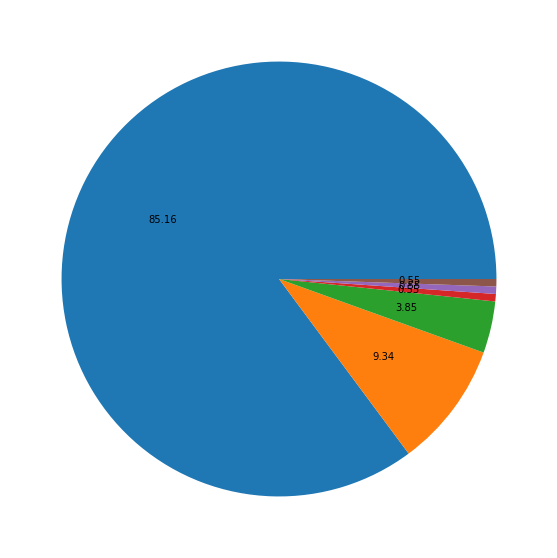

In [43]:
fig,ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax.pie(l,autopct= '%.2f')
fig.show()

#7. creare un nuovo dataframe che nella colonna 'Language' contenga solo 'English' o 'non English'

In [27]:
df.loc[df['Language'] !="English" , "Language" ] = 'non English'
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,non English,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,non English,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
373,374,The Danny Thomas Show,1958.0,3.0,English,Comedy,7.2,All
374,375,Hitoshi Matsumoto Presents Documental,2018.0,3.0,non English,Comedy,8.0,18+
375,376,Businessmen VS Aliens,2018.0,1.0,non English,Comedy,4.5,13+
379,380,Scooter: Secret Agent,2003.0,1.0,English,Comedy,6.8,All


In [28]:
df.groupby(["Name of the show","Language"]).count()

,,S.no.,Year of release,No of seasons available,Genre,IMDb rating,Age of viewers
Name of the show,Language,,,,,,
#IMomSoHard Live,English,1,1,1,1,1,1
2 Broke Girls,English,1,1,1,1,1,1
Absentia,English,1,1,1,1,1,1
Alice Wettlund: My Mama is a Human and So Am I,English,1,1,1,1,1,1
Alonzo Bodden: Heavy Lightweight,English,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Trial and Error,English,1,1,1,1,1,1
Two and a Half Men,English,1,1,1,1,1,1
Undone,English,1,1,1,1,1,1


In [29]:
df1 = df.groupby(['Name of the show', 'Language']).size().unstack(fill_value=0)
df1

Language,English,non English
Name of the show,,
#IMomSoHard Live,1,0
2 Broke Girls,1,0
Absentia,1,0
Alice Wettlund: My Mama is a Human and So Am I,1,0
Alonzo Bodden: Heavy Lightweight,1,0
...,...,...
Trial and Error,1,0
Two and a Half Men,1,0
Undone,1,0


In [30]:
df1.reset_index()

Language,Name of the show,English,non English
0,#IMomSoHard Live,1,0
1,2 Broke Girls,1,0
2,Absentia,1,0
3,Alice Wettlund: My Mama is a Human and So Am I,1,0
4,Alonzo Bodden: Heavy Lightweight,1,0
...,...,...,...
176,Trial and Error,1,0
177,Two and a Half Men,1,0
178,Undone,1,0
179,Upload,1,0


#8. visualizzare un grafico a barre con gli anni sulle ascisse e il numero di show in inglese e non in inglese sulle ordinate. Considerare solo gli ultimi 10 anni (vedi grafico allegato come esempio)

KeyError: ignored

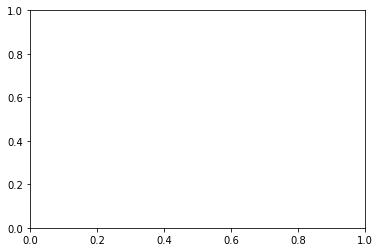

In [31]:
y = df1.index.tolist()
x = np.arange(len(y))  
#questa corrisponde alla larghezza delle barre e useremo questo valore per affiancare gli altri dati
width = 0.35 
fig,ax = plt.subplots()
#creo la prima asse , tramite la sottrazione del width alla x che è la lungezza della y
ax.bar(x - width/2,df1["Name of the show"],width)
#creo la seconda asse su cui attirbuisco altri valori, affiancandolo tramite la somma del width
ax.bar(x + width/2,df1[""],width)
plt.xticks(x, y)
plt.xticks(rotation=90)
plt.show()

labels = dfpivot.borough
men_means = dfpivot.American
women_means = dfpivot['non American']

x = np.arange(len(labels))             # the label locations
width = 0.35                           # the width of the bars
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='American')
rects2 = ax.bar(x + width/2, women_means, width, label='non American')

fig.autofmt_xdate(rotation=90)         # Ruota i nomi dei valori sulle ascisse di 45 gradi
fig.suptitle('Tipologia di cucina')    # Imposta il titolo del grafico
fig.legend(loc=1)                      # Crea la legenda e la posiziona nel I quadrante

ax.set_xticks(x)                       # Seleziona ogni quanto visualizzare un nome sulle ascisse
ax.set_xticklabels(labels) 
plt.savefig('Ensomma.png')             #Salva l'immagine in pdf
plt.show()